In [2]:
#Bit of a learning exercise--never tuned a XGB.  Basically doing a grid search and looking at what params do.
#Yes tuning each one individually, not looking at interactions. Baby Steps.
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
%matplotlib inline
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
loss=train['loss']
ids=train['id']
#just lazy as I already munged in the data in Allstate Basic, so I reload the munged data.
train=pd.read_csv('../data/train_ohe.csv')
train.drop(['loss'],inplace=True,axis=1)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2885.560791	test-mae:2882.025635
[1]	train-mae:2741.814209	test-mae:2738.514404
[2]	train-mae:2606.396240	test-mae:2602.758789
[3]	train-mae:2479.210938	test-mae:2475.666016
[4]	train-mae:2360.835205	test-mae:2356.917480
[5]	train-mae:2251.021240	test-mae:2246.858643
[6]	train-mae:2149.879883	test-mae:2145.652344
[7]	train-mae:2057.420898	test-mae:2053.674316
[8]	train-mae:1973.547852	test-mae:1969.919678
[9]	train-mae:1897.940796	test-mae:1894.356812
[10]	train-mae:1828.003418	test-mae:1824.353271
[11]	train-mae:1765.683960	test-mae:1762.236572
[12]	train-mae:1709.985107	test-mae:1706.869385
[13]	train-mae:1661.068604	test-mae:1658.104004
[14]	train-mae:1616.514282	test-mae:1613.590210
[15]	train-mae:1577.802856	test-mae:1574.570923
[16]	train-mae:1541.853027	test-mae:1539.016968
[17]	train-mae:1510.329956	test-mae:1507.904297
[18]	train-mae:1482.660645	test-mae:1480.064087
[19]	train-mae:1457.336426	test-mae:145

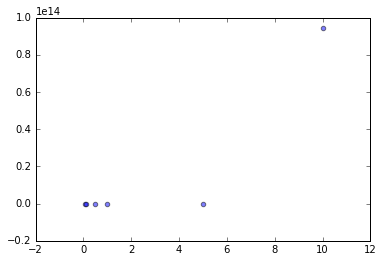

In [10]:
from sklearn.model_selection import train_test_split
#xgbmodel needs optimize
X_train, X_test, y_train, y_test = train_test_split(train, loss, test_size=0.1, random_state=42)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
watchlist  = [(dtrain,'train'),(dtest,'test')]
a=[0.05,0.1,0.5,1,5,10]
eta=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':6, 
             'eta':i, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.7,
             'subsample': 0.7,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    eta=np.append(eta,[i])
    MAE=np.append(MAE,[mae])
plt.scatter(eta, MAE, alpha=0.5)
plt.show()

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.320312	test-mae:2730.472656
[1]	train-mae:2466.463867	test-mae:2462.628418
[2]	train-mae:2236.423096	test-mae:2231.470947
[3]	train-mae:2044.815552	test-mae:2039.636353
[4]	train-mae:1888.124023	test-mae:1883.272461
[5]	train-mae:1764.490723	test-mae:1760.186401
[6]	train-mae:1668.419800	test-mae:1664.025391
[7]	train-mae:1591.225830	test-mae:1587.276611
[8]	train-mae:1533.289062	test-mae:1529.222534
[9]	train-mae:1486.722290	test-mae:1481.351685
[10]	train-mae:1452.109619	test-mae:1445.512939
[11]	train-mae:1422.832886	test-mae:1415.563354
[12]	train-mae:1401.909790	test-mae:1394.932983
[13]	train-mae:1386.907593	test-mae:1379.448608
[14]	train-mae:1372.358398	test-mae:1365.387573
[15]	train-mae:1362.268311	test-mae:1355.682617
[16]	train-mae:1353.159424	test-mae:1347.160034
[17]	train-mae:1347.188599	test-mae:1341.349243
[18]	train-mae:1341.861328	test-mae:1335.595215
[19]	train-mae:1336.279053	test-mae:133

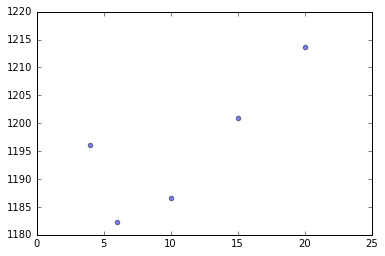

In [13]:
a=[4,6,10,15,20]
depth=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':i, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.7,
             'subsample': 0.7,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    depth=np.append(depth,[i])
    MAE=np.append(MAE,[mae])
plt.scatter(depth, MAE, alpha=0.5)
plt.show()

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2735.819336	test-mae:2732.093750
[1]	train-mae:2467.237305	test-mae:2463.984131
[2]	train-mae:2236.424316	test-mae:2231.821045
[3]	train-mae:2040.761353	test-mae:2036.651001
[4]	train-mae:1879.353271	test-mae:1875.203857
[5]	train-mae:1749.599976	test-mae:1745.072998
[6]	train-mae:1645.313232	test-mae:1640.568848
[7]	train-mae:1562.853394	test-mae:1559.351440
[8]	train-mae:1497.583740	test-mae:1494.694580
[9]	train-mae:1448.372559	test-mae:1445.242920
[10]	train-mae:1408.725952	test-mae:1405.675171
[11]	train-mae:1374.561523	test-mae:1372.251831
[12]	train-mae:1351.067749	test-mae:1348.630005
[13]	train-mae:1332.358154	test-mae:1330.040894
[14]	train-mae:1317.261230	test-mae:1315.651733
[15]	train-mae:1303.570801	test-mae:1302.528198
[16]	train-mae:1294.229248	test-mae:1293.254517
[17]	train-mae:1287.551880	test-mae:1287.373169
[18]	train-mae:1282.610107	test-mae:1281.881348
[19]	train-mae:1278.491821	test-mae:127

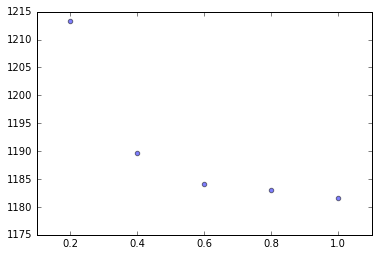

In [14]:
a=[0.2,0.4,0.6,0.8,1.0]
subsam=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':6, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.7,
             'subsample': i,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    subsam=np.append(subsam,[i])
    MAE=np.append(MAE,[mae])
plt.scatter(subsam, MAE, alpha=0.5)
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.794189	test-mae:2731.253662
[1]	train-mae:2465.963379	test-mae:2462.881104
[2]	train-mae:2234.592529	test-mae:2231.275879
[3]	train-mae:2041.077637	test-mae:2038.528931
[4]	train-mae:1886.221313	test-mae:1883.152100
[5]	train-mae:1758.777710	test-mae:1756.788940
[6]	train-mae:1659.124023	test-mae:1657.877686
[7]	train-mae:1581.606201	test-mae:1580.578003
[8]	train-mae:1523.016113	test-mae:1522.203247
[9]	train-mae:1474.393921	test-mae:1474.438477
[10]	train-mae:1433.994507	test-mae:1434.140747
[11]	train-mae:1400.194092	test-mae:1400.461548
[12]	train-mae:1377.401978	test-mae:1378.023438
[13]	train-mae:1357.453735	test-mae:1358.100952
[14]	train-mae:1342.318115	test-mae:1343.278931
[15]	train-mae:1329.085205	test-mae:1329.696777
[16]	train-mae:1318.132690	test-mae:1319.080688
[17]	train-mae:1306.140381	test-mae:1306.953613
[18]	train-mae:1299.878784	test-mae:1300.737305
[19]	train-mae:1292.688965	test-mae:129

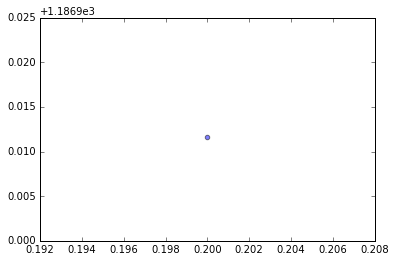

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.805908	test-mae:2731.116699
[1]	train-mae:2465.857666	test-mae:2462.255127
[2]	train-mae:2233.777344	test-mae:2230.734131
[3]	train-mae:2038.323853	test-mae:2035.036743
[4]	train-mae:1879.758789	test-mae:1876.977295
[5]	train-mae:1749.441040	test-mae:1747.170288
[6]	train-mae:1645.820435	test-mae:1642.684326
[7]	train-mae:1564.962891	test-mae:1562.328491
[8]	train-mae:1501.694336	test-mae:1498.613159
[9]	train-mae:1449.279053	test-mae:1445.754761
[10]	train-mae:1410.406860	test-mae:1406.616455
[11]	train-mae:1374.848999	test-mae:1371.614746
[12]	train-mae:1345.962402	test-mae:1343.668945
[13]	train-mae:1326.819824	test-mae:1324.025269
[14]	train-mae:1311.303345	test-mae:1308.120972
[15]	train-mae:1299.352905	test-mae:1296.577393
[16]	train-mae:1290.853027	test-mae:1288.605835
[17]	train-mae:1282.615967	test-mae:1280.762329
[18]	train-mae:1277.054199	test-mae:1275.776611
[19]	train-mae:1271.470581	test-mae:127

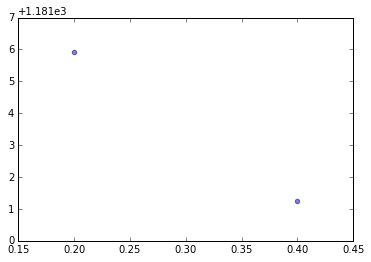

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.738037	test-mae:2730.527832
[1]	train-mae:2466.426758	test-mae:2461.933838
[2]	train-mae:2234.350098	test-mae:2229.321777
[3]	train-mae:2039.178955	test-mae:2034.929443
[4]	train-mae:1879.547729	test-mae:1875.784790
[5]	train-mae:1750.184937	test-mae:1746.399414
[6]	train-mae:1647.316528	test-mae:1643.380859
[7]	train-mae:1564.735474	test-mae:1561.033325
[8]	train-mae:1497.906128	test-mae:1494.605225
[9]	train-mae:1446.037720	test-mae:1443.123779
[10]	train-mae:1405.960693	test-mae:1404.037231
[11]	train-mae:1373.592529	test-mae:1372.086182
[12]	train-mae:1348.206543	test-mae:1346.872192
[13]	train-mae:1329.310181	test-mae:1327.473267
[14]	train-mae:1312.537964	test-mae:1310.801025
[15]	train-mae:1300.942383	test-mae:1299.511230
[16]	train-mae:1289.918823	test-mae:1288.983032
[17]	train-mae:1281.721680	test-mae:1281.306641
[18]	train-mae:1276.051147	test-mae:1275.948730
[19]	train-mae:1271.230225	test-mae:127

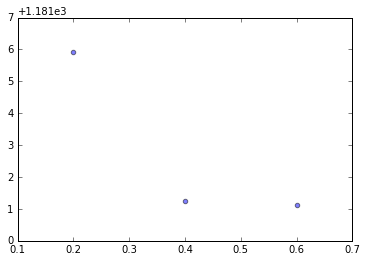

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.642578	test-mae:2730.750732
[1]	train-mae:2466.378418	test-mae:2463.080566
[2]	train-mae:2234.818115	test-mae:2230.360352
[3]	train-mae:2039.719727	test-mae:2035.082153
[4]	train-mae:1879.658203	test-mae:1876.335327
[5]	train-mae:1750.887451	test-mae:1747.137695
[6]	train-mae:1648.771973	test-mae:1645.234863
[7]	train-mae:1566.771118	test-mae:1562.484131
[8]	train-mae:1500.601929	test-mae:1496.410767
[9]	train-mae:1449.282227	test-mae:1444.945557
[10]	train-mae:1406.838623	test-mae:1402.896240
[11]	train-mae:1374.676514	test-mae:1371.488892
[12]	train-mae:1350.959961	test-mae:1348.116455
[13]	train-mae:1329.734741	test-mae:1327.470947
[14]	train-mae:1314.929199	test-mae:1313.139160
[15]	train-mae:1302.514893	test-mae:1301.721313
[16]	train-mae:1291.404785	test-mae:1291.061646
[17]	train-mae:1283.093262	test-mae:1283.522461
[18]	train-mae:1276.093506	test-mae:1277.343506
[19]	train-mae:1271.150757	test-mae:127

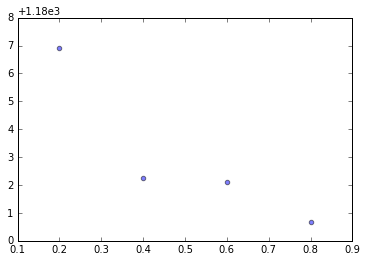

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.616455	test-mae:2730.780518
[1]	train-mae:2466.422363	test-mae:2463.065674
[2]	train-mae:2235.069336	test-mae:2230.589844
[3]	train-mae:2039.997314	test-mae:2035.334351
[4]	train-mae:1881.458618	test-mae:1877.252930
[5]	train-mae:1750.872314	test-mae:1748.042847
[6]	train-mae:1646.917236	test-mae:1644.470337
[7]	train-mae:1565.532349	test-mae:1562.662964
[8]	train-mae:1499.501221	test-mae:1496.533081
[9]	train-mae:1447.520630	test-mae:1444.975952
[10]	train-mae:1407.007812	test-mae:1405.447144
[11]	train-mae:1375.142090	test-mae:1374.016846
[12]	train-mae:1350.167480	test-mae:1349.295044
[13]	train-mae:1330.742554	test-mae:1329.765991
[14]	train-mae:1315.505859	test-mae:1315.067261
[15]	train-mae:1302.744385	test-mae:1303.622803
[16]	train-mae:1293.431030	test-mae:1294.491211
[17]	train-mae:1284.602783	test-mae:1286.310059
[18]	train-mae:1278.766479	test-mae:1280.821289
[19]	train-mae:1273.391724	test-mae:127

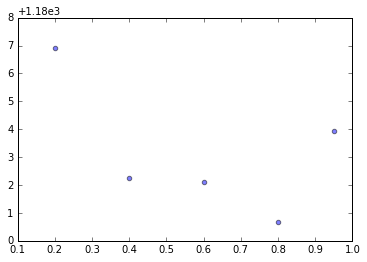

In [3]:
from sklearn.model_selection import train_test_split
#xgbmodel needs optimize
X_train, X_test, y_train, y_test = train_test_split(train, loss, test_size=0.1, random_state=42)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
watchlist  = [(dtrain,'train'),(dtest,'test')]
a=[0.2,0.4,0.6,0.8,0.95]
treesam=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':6, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': i,
             'subsample': 0.8,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    treesam=np.append(treesam,[i])
    MAE=np.append(MAE,[mae])
    plt.scatter(treesam, MAE, alpha=0.5)
    plt.show()

In [4]:
MAE

array([ 1186.91159028,  1182.24115047,  1182.11872279,  1180.67094374,
        1183.93790477])